In [1]:
import pandas as pd

In [2]:
df_LondonHousing = pd.read_csv("./london-housing.csv")

In [3]:
df_LondonHousing

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [4]:
df_LondonHousing.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [5]:
df_LondonHousing.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

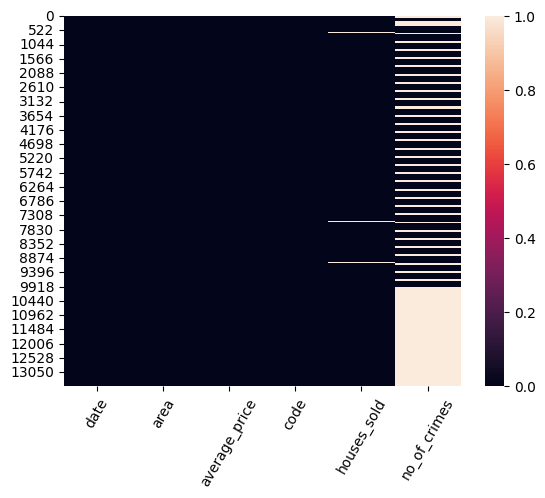

In [7]:
sns.heatmap(df_LondonHousing.isnull())
plt.xticks(rotation = 60)
plt.show()

#### 1. Convert the datatype of "Date" column to date-time format

In [8]:
df_LondonHousing['date'] = pd.to_datetime(df_LondonHousing['date'], errors='coerce')

In [9]:
df_LondonHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 635.2+ KB


In [10]:
df_LondonHousing['date'].dtype

dtype('<M8[ns]')

#### 2. Add a new column 'year' in the dataframe, which conftains years only

In [11]:
df_LondonHousing['year'] = df_LondonHousing['date'].dt.year

In [12]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995


#### 3. Add a new column 'mounth' as 2nd column in the dataframe, which contains month only

In [13]:
df_LondonHousing['month']= df_LondonHousing['date'].dt.month

In [14]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995,3


In [15]:
df_LondonHousing.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
year                      int64
month                     int64
dtype: object

##### We can use insert

In [16]:
df_LondonHousing.drop(columns=['year' , 'month'], inplace=True)

In [17]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN


In [18]:
# insert (index, new column name, values)
df_LondonHousing.insert(1, "year" , df_LondonHousing['date'].dt.year)
df_LondonHousing.insert(1, "month" , df_LondonHousing['date'].dt.month)

In [19]:
df_LondonHousing.head(3)

,date,month,year,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,1,1995,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,2,1995,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,3,1995,city of london,79121,E09000001,14.0,NaN


#### 4. Remove the columns 'Year' and 'Month' from the dataframe

In [20]:
df_LondonHousing.drop(columns=['year' , 'month'], inplace=True)

In [21]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN


#### 5. Show all the records where 'No. of Crimes' is 0. and how many such records are there?

In [22]:
df_LondonHousing[df_LondonHousing['no_of_crimes'] == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [23]:
len(df_LondonHousing[df_LondonHousing['no_of_crimes'] == 0])

104

#### 6. What is the maximum & Minimum 'average_price' per year in england?

In [24]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN


In [25]:
df_LondonHousing['year'] = df_LondonHousing['date'].dt.year

In [26]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995


In [27]:
df_LondonHousing.groupby('year')['average_price'].mean().sort_values(ascending = False)

year
2017    469978.938889
2018    467240.674074
2020    463329.977778
2019    460056.659259
2016    454884.461111
2015    421356.100000
2014    388208.392593
2013    334589.564815
2012    309409.501852
2011    294819.138889
2010    287559.164815
2008    287478.972222
2007    285944.279630
2009    259296.896296
2006    249303.109259
2005    233314.512963
2004    224604.720370
2003    205099.553704
2002    182190.731481
2001    156932.355556
2000    139979.442593
1999    114256.172222
1998    101747.073801
1997     89618.350000
1996     78875.274908
1995     75880.235185
Name: average_price, dtype: float64

#### 7. What is the maximum & minimum no. of crimes recorded per area?

In [28]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995


In [29]:
df_LondonHousing.groupby('area')['no_of_crimes'].min()

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

In [30]:
df_LondonHousing.groupby('area')['no_of_crimes'].max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

#### 8. show the total count of record of each area, where average price is less than 100000

In [31]:
df_LondonHousing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995


In [32]:
df_LondonHousing[df_LondonHousing['average_price'] < 100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              